In [ ]:
fileList={
    "DF1":"botometer-feedback-2019",
    "DF2":"botwiki-2019",
    "DF3":"celebrity-2019",
    "DF4":"cresci-rtbust-2019",
    "DF5":"cresci-stock-2018",
    "DF6":"gilani-2017",
    "DF7":"midterm-2018",
    "DF8":"political-bots-2019",
    "DF9":"pronbots-2019",
    "DF10":"vendor-purchased-2019",
    "DF11":"verified-2019",
    "DF12":"pron-celebrity",#DF3+DF9
    "DF13":"political-feedback",#DF1+DF8
    "DF14":"botwiki-verified",#DF2+DF11
    "DF15":"vendor-verified",#DF10+DF11
}


remainForTesting={
    "DF4":"cresci-rtbust",
    "DF5":"cresci-stock",
    "DF6":"gilani-17",
    "DF7":"midterm-18",
    "DF12":"pron-celebrity",
    "DF13":"political-feedback",
    "DF14":"botwiki-verified",
    "DF15":"vendor-verified",
    "DF16":"cresci-17"
}
["caveree","varol-icwsm","cresci-2017"]



remainForTesting={
    "DF4":"cresci-rtbust-2019",
    "DF5":"cresci-stock-2018",
    "DF6":"gilani-2017",
    "DF7":"midterm-2018",
    "DF12":"pron-celebrity",#DF3+DF9
    "DF13":"political-feedback",#DF1+DF8
    "DF14":"botwiki-verified",#DF2+DF11
    "DF15":"vendor-verified",#DF10+DF11
    "DF16":"cresci-17",#DF10+DF11
}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
import csv
import numpy as np
import pandas as pd
from urllib.parse import quote  
import scipy.stats as stats


from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns

from sklearn.preprocessing      import QuantileTransformer
from sklearn.preprocessing      import StandardScaler
from sklearn.ensemble           import IsolationForest
from sklearn.decomposition      import PCA

from sklearn.preprocessing      import MinMaxScaler, StandardScaler, Normalizer, Binarizer, minmax_scale, MaxAbsScaler, RobustScaler, QuantileTransformer, PowerTransformer

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [ ]:
SelectedFeatures=[ "favourites_count","friends_growth_rate","friends_count","followers_count","favourites_growth_rate","tweet_freq","num_digits_in_screen_name","followers_growth_rate","followers_friends_ratio","description_length","class"]

In [ ]:
def show_TSNE(df,min,max):
    
    fig, ax = plt.subplots(1)
    sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=df, ax=ax,s=120)
    lim = (min, max)
    ax.set_xlim(lim)
    ax.set_ylim(lim)
    ax.set_aspect('equal')
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


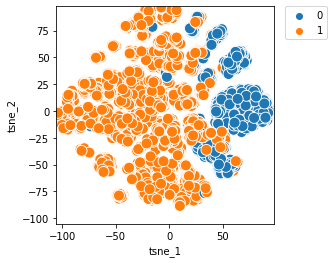

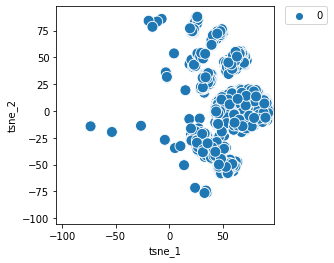

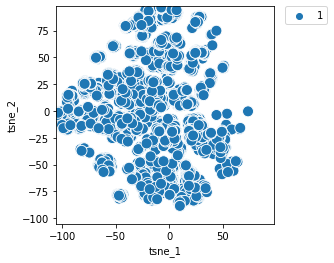

In [ ]:
good = pd.read_csv(f'PATH/DATA/MetaData/Test/DS16.csv.gz',compression='gzip',lineterminator='\n');
good=good[SelectedFeatures]

normalizingModels=StandardScaler(output_distribution="normal",n_quantiles=len(good))
X_good = normalizingModels.fit_transform(good.drop(columns=["class"],axis=1))
y_good = good['class'].map({"bot": 1, "human": 0});


outlierPrediction=(IsolationForest(contamination=0.01).fit_predict(X_good)!= -1)
X_good= X_good[outlierPrediction]
y_good= y_good[outlierPrediction]


tsne_result = TSNE(n_components=2,init="pca").fit_transform(X_good)
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y_good})
show_TSNE(tsne_result_df,tsne_result.min(),tsne_result.max())
show_TSNE(tsne_result_df[tsne_result_df["label"]==0],tsne_result.min(),tsne_result.max())
show_TSNE(tsne_result_df[tsne_result_df["label"]==1],tsne_result.min(),tsne_result.max())

In [ ]:
tsne_2 = TSNE(n_components=2,init="pca")
tsne_result_2 = tsne_2.fit_transform(X_bad)
 

tsne_result_df_2 = pd.DataFrame({'tsne_1': tsne_result_2[:,0], 'tsne_2': tsne_result_2[:,1], 'label': y_bad})

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


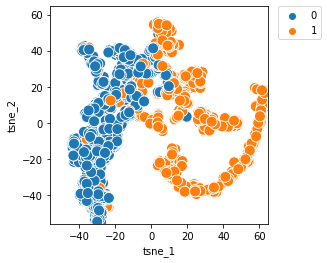

In [ ]:
DS1 = pd.read_csv(f'PATH/DATA/MetaData/Test/DS7.csv.gz',compression='gzip',lineterminator='\n');

DS1=DS1[SelectedFeatures]


DS1=pd.concat([DS1[DS1["class"]=="bot"].sample(1000),DS1[DS1["class"]=="human"].sample(1000)]);
DS1=DS1.sample(frac=1).reset_index(drop=True)



normalizingModels=Normalizer()
X_DS1 = normalizingModels.fit_transform(DS1.drop(columns=["class"],axis=1))
y_DS1 = DS1['class'].map({"bot": 1, "human": 0});


tsne_DS1 = TSNE(n_components=2,init="pca").fit_transform(X_DS1)
 

tsne_df_DS1 = pd.DataFrame({'tsne_1': tsne_DS1[:,0], 'tsne_2': tsne_DS1[:,1], 'label': y_DS1})





# show_TSNE(tsne_df_DS1[tsne_df_DS1["label"]==1],tsne_DS1.min(),tsne_DS1.max())
# show_TSNE(tsne_df_DS1[tsne_df_DS1["label"]==0],tsne_DS1.min(),tsne_DS1.max())
show_TSNE(tsne_df_DS1,tsne_DS1.min(),tsne_DS1.max())

In [ ]:
 # tsne_df_DS1 = tsne_df_DS1.sort_values(by=['label'], ascending=True)
# sns.scatterplot(x='tsne_1', y=datasetsLabel[index], hue='label', data=tsne_df_DS1, ax=axs[index],s=120,c=["blue","red"])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.

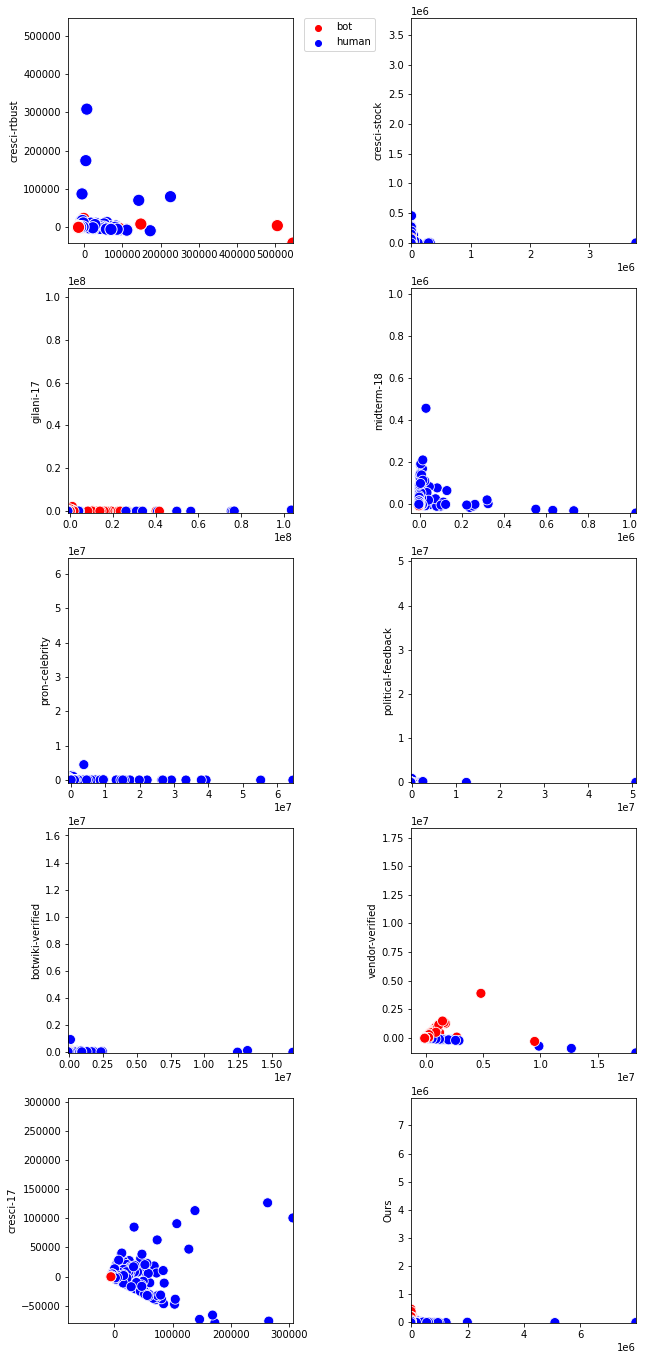

In [ ]:


# DS20 --->>> is equal to [PATH/DATA/MetaData/Final/DS1.csv.gz]
datasets=["DS4","DS5","DS6","DS7","DS12","DS13","DS14","DS15","DS16","DS20"]
datasetsLabel=["cresci-rtbust","cresci-stock","gilani-17","midterm-18","pron-celebrity","political-feedback","botwiki-verified","vendor-verified","cresci-17","Ours"]



fig, axs = plt.subplots(5,2, figsize=(12, 24), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .2, wspace=0.05)


axs = axs.ravel()

for index,dataset in enumerate(datasets):

    DS1 = pd.read_csv(f'PATH/DATA/MetaData/Test/{dataset}.csv.gz',compression='gzip',lineterminator='\n');

    DS1=DS1[SelectedFeatures]

    if len(DS1[DS1["class"]=="human"])>1000 and len(DS1[DS1["class"]=="bot"])>1000:
        DS1=pd.concat([DS1[DS1["class"]=="bot"].sample(1000),DS1[DS1["class"]=="human"].sample(1000)])
    elif len(DS1[DS1["class"]=="human"])>1000:
        DS1=pd.concat([DS1[DS1["class"]=="bot"],DS1[DS1["class"]=="human"].sample(1000)])
    elif len(DS1[DS1["class"]=="bot"])>1000:
        DS1=pd.concat([DS1[DS1["class"]=="bot"].sample(1000),DS1[DS1["class"]=="human"]])

    
    DS1=DS1.sample(frac=1).reset_index(drop=True)
    y_DS1=DS1["class"]

    normalizingModels=Normalizer()
    
    X_DS1 = normalizingModels.fit_transform(DS1.drop(columns=["class"],axis=1))


    tsne_DS1 = TSNE(n_components=2,init="pca").fit_transform(X_DS1)

    tsne_df_DS1 = pd.DataFrame({'tsne_1': tsne_DS1[:,0], datasetsLabel[index]: tsne_DS1[:,1], 'label': y_DS1})


    if index==0:
        sns.scatterplot(
            x='tsne_1', 
            y=datasetsLabel[index], 
            data=tsne_df_DS1, 
            ax=axs[index],
            hue='label',
            palette={"bot":"red","human":"blue"},
            # legend=False,
            s=150, #mean size
        )
    else: 
        sns.scatterplot(
            x='tsne_1', 
            y=datasetsLabel[index], 
            data=tsne_df_DS1, 
            ax=axs[index],
            hue='label',
            palette={"bot":"red","human":"blue"},
            legend=False,
            s=100
        )


    lim = (tsne_DS1.min(), tsne_DS1.max())

    axs[index].set_xlim(lim)
    axs[index].set_ylim(lim)
    axs[index].set_xlabel("")


    axs[index].set_aspect('equal')

    axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.0)
    # axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.0,prop={'size': 14})

In [ ]:
import matplotlib.pyplot
matplotlib.pyplot.scatter([1,2,3],[4,5,6],color=['red','green','blue'])


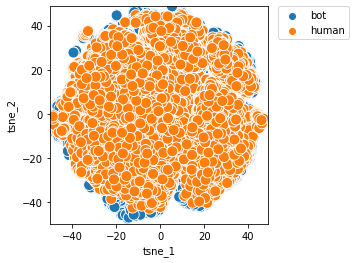

In [ ]:
# tDS1 = pd.read_csv(f'PATH/DATA/MetaData/Final/t-DS1.csv.gz',compression='gzip',lineterminator='\n');
# tDS1=tDS1[SelectedFeatures]


# normalizingModels=QuantileTransformer(
#     output_distribution="normal",
#     n_quantiles=100000
# )

# X_tDS1 = normalizingModels.fit_transform(
#     tDS1.drop(columns=["class"],axis=1)
# )
# y_tDS1 = tDS1['class'].map({"bot": 1, "human": 0});


# outlierPrediction=(IsolationForest(contamination=0.01).fit_predict(X_tDS1)!= -1)
# X_tDS1= X_tDS1[outlierPrediction]
# y_tDS1= y_tDS1[outlierPrediction]


# tsne_tDS1 = TSNE(n_components=2,init="pca").fit_transform(X_tDS1)
 

# tsne_df_tDS1 = pd.DataFrame({'tsne_1': tsne_tDS1[:,0], 'tsne_2': tsne_tDS1[:,1], 'label': y_tDS1})

tsne_df_tDS1["label"] = tsne_df_tDS1["label"].map({1:"bot", 0:"human"});


# show_TSNE(tsne_df_tDS1[tsne_df_tDS1["label"]==0],tsne_tDS1.min(),tsne_tDS1.max())
# show_TSNE(tsne_df_tDS1[tsne_df_tDS1["label"]==1],tsne_tDS1.min(),tsne_tDS1.max())
show_TSNE(tsne_df_tDS1,tsne_tDS1.min(),tsne_tDS1.max())

In [ ]:
DS1 = pd.read_csv(f'PATH/DATA/MetaData/Final/DS1.csv.gz',compression='gzip',lineterminator='\n');

In [ ]:
DS1.head()

,listed_count,statuses_count,favourites_count,profile_background_tile,profile_background_image_url_https,friends_count,has_extended_profile,followers_count,default_profile,profile_use_background_image,default_profile_image,profile_banner_url,geo_enabled,verified,entities,class,diff_days,name_length,screen_name_length,description_length,num_digits_in_name,num_digits_in_screen_name,tweet_freq,followers_growth_rate,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,Name_entropy,Screen_name_entropy,Name_freq,Screen_name_freq,Name_similarity,_url,_location
0,0,120,45,0,0,1056,1,32,1,1,0,1,0,0,0,bot,23,28,14,49,5,5,5.217391,1.391304,45.913043,1.956522,0.0,1.391304,0.148394,0.261750,1.0,1.0,0.619048,0,1
1,0,7,0,0,0,27,1,3,1,1,1,0,0,0,0,bot,32,11,15,0,0,8,0.218750,0.093750,0.843750,0.000000,0.0,0.093750,0.242139,0.233793,0.9,1.0,0.538462,0,0
2,0,275,168,0,0,1615,0,337,1,1,0,0,0,0,0,bot,837,6,7,15,0,1,0.328554,0.402628,1.929510,0.200717,0.0,0.402628,0.375272,0.360234,1.0,1.0,0.923077,0,1
3,0,4,0,0,0,45,1,2,1,1,0,0,0,0,0,bot,1,11,15,25,0,8,4.000000,2.000000,45.000000,0.000000,0.0,2.000000,0.281436,0.212660,1.0,1.0,0.538462,0,0
4,0,16,1,0,0,2,0,109,1,1,0,0,0,0,0,bot,498,11,9,5,0,0,0.032129,0.218876,0.004016,0.002008,0.0,0.218876,0.231849,0.253448,1.0,1.0,0.900000,0,0


In [ ]:
DS1.nunique(axis=0,dropna=False)

listed_count                           1727
statuses_count                        30069
favourites_count                      27803
profile_background_tile                   2
profile_background_image_url_https        2
friends_count                          5874
has_extended_profile                      2
followers_count                        8565
default_profile                           2
profile_use_background_image              2
default_profile_image                     2
profile_banner_url                        2
geo_enabled                               2
verified                                  2
entities                                  2
class                                     2
diff_days                              1950
name_length                              51
screen_name_length                       14
description_length                      194
num_digits_in_name                       19
num_digits_in_screen_name                14
tweet_freq                      

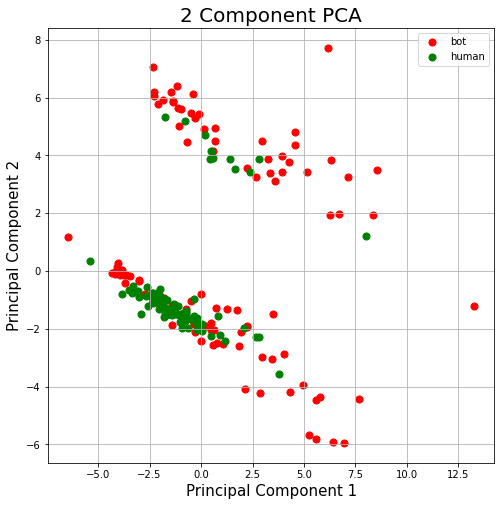

In [ ]:
DS1 = pd.read_csv(f'PATH/DATA/MetaData/Test/DS14.csv.gz',compression='gzip',lineterminator='\n');

DS1=DS1[SelectedFeatures]


DS1=pd.concat([DS1[DS1["class"]=="bot"].sample(100),DS1[DS1["class"]=="human"].sample(100)]);
DS1=DS1.sample(frac=1).reset_index(drop=True)

y=DS1['class']

normalizingModels=QuantileTransformer(output_distribution="normal",n_quantiles=len(DS1))
X_DS1 = normalizingModels.fit_transform(DS1.drop(columns=["class"],axis=1))


principalDf = pd.DataFrame(
    data = PCA(n_components=2).fit_transform(X_DS1), 
    columns = ['principal component 1', 'principal component 2']
)
principalDf["class"]=y.values


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['bot', 'human']
colors = ['r', 'g']

for target, color in zip(targets,colors):

    indicesToKeep = principalDf['class'] == target
    
    ax.scatter(
        principalDf.loc[indicesToKeep, 'principal component 1'], 
        principalDf.loc[indicesToKeep, 'principal component 2'], 
        c = color,
        s = 50
    )
    

ax.legend(targets)
ax.grid()